**Applying LDA**

**Importing the libraries**

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Loading the data**

In [21]:
data = pd.read_csv(r'wine.csv')

In [22]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [23]:
X=data.iloc[:,1:].values
y=data.iloc[:,0].values

**Splitting the dataset**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling**

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

**Applying PCA**

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda_X_train = lda.fit_transform(X_train_scaled,y_train)
lda_X_test = lda.transform(X_test_scaled)

**Applying Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(lda_X_train,y_train)

LogisticRegression()

In [28]:
y_pred = classifier.predict(lda_X_test)

In [29]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
0,1,1
1,1,1
2,3,3
3,1,1
4,2,2
5,1,1
6,2,2
7,3,3
8,2,2
9,3,3


**Confusion Matrix**

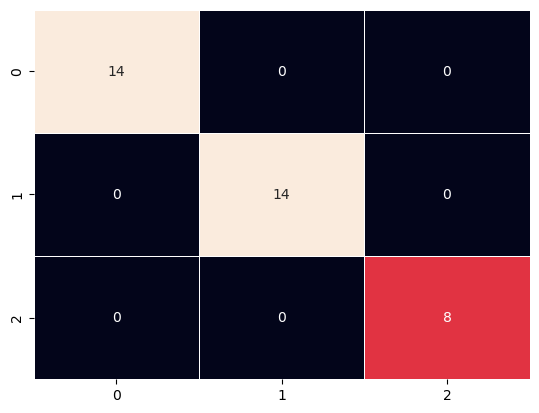

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf=confusion_matrix(y_test,y_pred)
sns.heatmap(conf,annot=True,lw=.5,cbar=False);

In [31]:
accuracy_score(y_test,y_pred)

1.0

**Visualizing the training set results**

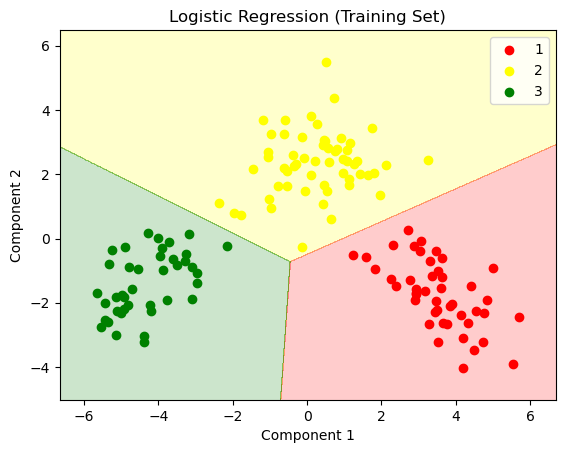

In [32]:
from matplotlib.colors import ListedColormap
X_set , y_set = lda_X_train,y_train
X1,X2=((np.linspace(X_set[:,0].min()-1,X_set[:,0].max()+1,1000),
                   (np.linspace(X_set[:,1].min()-1,X_set[:,1].max()+1,1000))))
X1,X2=np.meshgrid(X1,X2)
Z= classifier.predict(np.array([X1.ravel(),X2.ravel()]).T)
plt.contourf(X1,X2,Z.reshape(X1.shape),cmap=ListedColormap(('red','yellow','green')),alpha=.2)

for i in np.unique(y_set):
    plt.scatter(X_set[y_set==i,0],X_set[y_set==i,1],label=i,c=['red','yellow','green'][i-1])
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend();

**Visualizing the test set results**

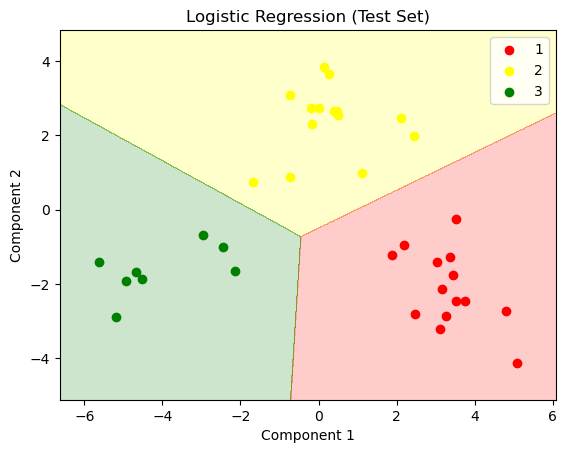

In [33]:
from matplotlib.colors import ListedColormap
X_set , y_set = lda_X_test,y_test
X1,X2=((np.linspace(X_set[:,0].min()-1,X_set[:,0].max()+1,1000),
                   (np.linspace(X_set[:,1].min()-1,X_set[:,1].max()+1,1000))))
X1,X2=np.meshgrid(X1,X2)
Z= classifier.predict(np.array([X1.ravel(),X2.ravel()]).T)
plt.contourf(X1,X2,Z.reshape(X1.shape),cmap=ListedColormap(('red','yellow','green')),alpha=.2)

for i in np.unique(y_set):
    plt.scatter(X_set[y_set==i,0],X_set[y_set==i,1],label=i,c=['red','yellow','green'][i-1])
plt.title('Logistic Regression (Test Set)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend();